In [2]:
# %load ./imports.py
# %load /Users/bartev/dev/github-bv/sporty/notebooks/imports.py

## Where am I
!echo $VIRTUAL_ENV

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# magics
%load_ext blackcellmagic
# start cell with `%%black` to format using `black`

%load_ext autoreload
# start cell with `%autoreload` to reload module
# https://ipython.org/ipython-doc/stable/config/extensions/autoreload.html

# reload all modules when running
%autoreload 2

# imports

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns

from importlib import reload
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# https://plotnine.readthedocs.io/en/stable/

import plotnine as p9
from plotnine import ggplot, aes, facet_wrap

from src.utils import lower_case_col_names, drop_suffix
import src.data.load_data as ld
from src.data.load_data import get_nba_game_team_points, load_nba, load_nba_games_dataset


/Users/bartev/.venvs/sport


# Correlation Analyses

* Any relationship between 2 variables?

* Start with a scatterplot

In [3]:
nba_games = load_nba_games_dataset()

/Users/bartev/dev/github-bv/sporty/src/utils.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
/Users/bartev/dev/github-bv/sporty/src/utils.py:13: FutureWarning: The default value of regex will change from True to False in a future version.


<AxesSubplot:xlabel='ast', ylabel='fgm'>

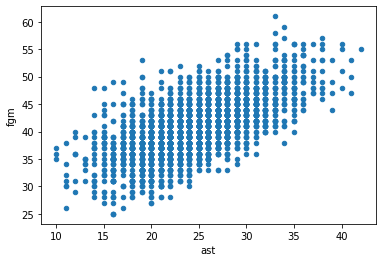

In [4]:
nba_games.plot.scatter(x='ast', y='fgm')

Add a regression line to better visualize the relationship

Use Seaborn

Text(0.5, 1.0, 'Relationship between the nmber of assists and FG made')

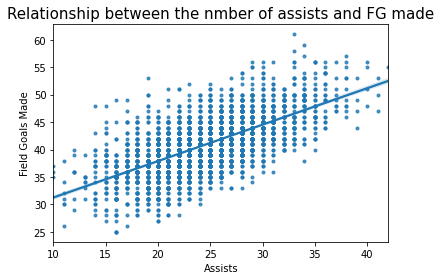

In [6]:
sns.regplot(x='ast', y='fgm', data=nba_games, marker='.')
plt.xlabel('Assists')
plt.ylabel('Field Goals Made')
plt.title('Relationship between the nmber of assists and FG made', fontsize=15)

Quantify the relation ship using correlation analysis.

Correlation coefficient - single number to summarize the relationship

# Covariance

A measure of the joint variability of 2 random variables.

The sign of the covariance shows the tendency in the linear relationship between the variables.

$$
\sigma_{xy} = cov(x, y) = E[(x - E(x))(y - E(y))]
$$

# Interpreting covariance

* Covariance depends on the unit of measurement.
* Typically, we only look at the *sign* of the covariance.

# Correlation Coefficient

Covariance divided by standard deviations.

* Correlation coefficient measures the lineaer correlation between 2 variables.
* does not depend on units
* values are between -1 and 1

$$
r = \frac{cov(x, y)}{\sigma_x \sigma_y}
$$

Correlation between assists and field goals made

In [7]:
nba_games['ast'].corr(nba_games['fgm'])

0.6460688906463778

Text(0.5, 1.0, 'Relationship between the nmber of assists and FG attempted')

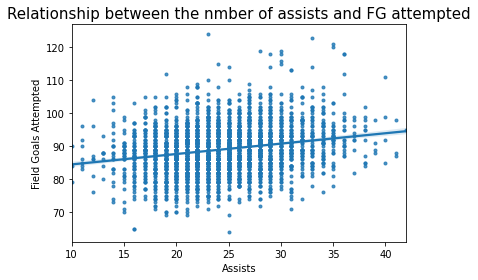

In [9]:
sns.regplot(x='ast', y='fga', data=nba_games, marker='.')
plt.xlabel('Assists')
plt.ylabel('Field Goals Attempted')
plt.title('Relationship between the nmber of assists and FG attempted', fontsize=15)

In [10]:
nba_games['ast'].corr(nba_games['fga'])

0.21827741421159078

# Plot scatter plot by group using `hue` option

In [ ]:
* `lmplot` combines `regplot` and `FacetGrid`
* `FacetGrid` produces a multi-plot grid for plotting conditional relationships.

Text(0.5, 1.0, 'Relationship between the number of assists and FG made')

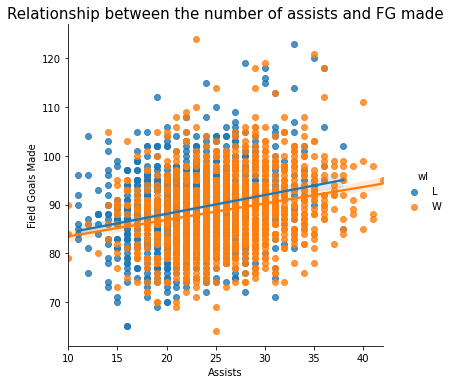

In [12]:
sns.lmplot(x='ast', y='fga', hue='wl', data=nba_games)
plt.xlabel('Assists')
plt.ylabel('Field Goals Made')
plt.title('Relationship between the number of assists and FG made', fontsize=15)

# Construct a correlation table for all numeric variables

In [14]:
nba_games.corr(method='pearson')

,season,home_team_wins,pts,fg_pct,ft_pct,fg3_pct,ast,reb,fgm,fga,fg3m,fg3a,ftm,fta
season,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_team_wins,NaN,1.000,0.015,-0.005,0.012,0.026,-0.007,0.008,0.007,0.015,0.016,-0.001,0.008,0.003
pts,NaN,0.015,1.000,0.694,0.168,0.513,0.581,0.164,0.840,0.323,0.514,0.194,0.310,0.262
fg_pct,NaN,-0.005,0.694,1.000,0.036,0.527,0.553,-0.142,0.773,-0.203,0.264,-0.174,-0.052,-0.070
ft_pct,NaN,0.012,0.168,0.036,1.000,0.036,-0.002,-0.052,0.001,-0.048,0.019,-0.014,0.331,-0.019
fg3_pct,NaN,0.026,0.513,0.527,0.036,1.000,0.406,-0.082,0.408,-0.106,0.693,-0.004,-0.060,-0.079
ast,NaN,-0.007,0.581,0.553,-0.002,0.406,1.000,0.062,0.646,0.218,0.420,0.169,-0.164,-0.172
reb,NaN,0.008,0.164,-0.142,-0.052,-0.082,0.062,1.000,0.151,0.437,0.030,0.127,0.061,0.089
fgm,NaN,0.007,0.840,0.773,0.001,0.408,0.646,0.151,1.000,0.460,0.325,0.035,-0.177,-0.190
fga,NaN,0.015,0.323,-0.203,-0.048,-0.106,0.218,0.437,0.460,1.000,0.132,0.300,-0.200,-0.194


In [15]:
nba_games.dtypes

game_date          object
game_id            object
season              int64
home_team_wins      int64
team_id            object
pts               float64
fg_pct            float64
ft_pct            float64
fg3_pct           float64
ast               float64
reb               float64
ha                 object
wl                 object
nickname           object
city               object
fgm               float64
fga               float64
fg3m              float64
fg3a              float64
ftm               float64
fta               float64
dtype: object